In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [3]:
df = pd.read_csv('housing.csv')[['latitude',
                                'longitude',
                                'housing_median_age',
                                'total_rooms',
                                'total_bedrooms',
                                'population',
                                'households',
                                'median_income',
                                'median_house_value']]

(0.0, 75.0)

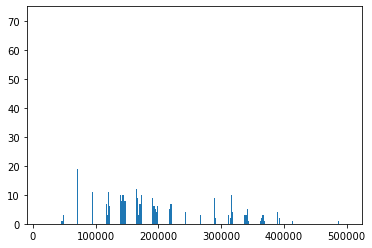

In [3]:
fig, ax = plt.subplots()
ax.hist(df.median_house_value, bins=20640)
ax.set_xlim()
ax.set_ylim(0, 75)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            20640 non-null  float64
 1   longitude           20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
20640 - 20433

207

In [6]:
df.population.median()

1166.0

In [7]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

df_train['total_bedrooms_filled_0'] = df_train['total_bedrooms'].fillna(0)
df_train['total_bedrooms_filled_mean'] = df_train['total_bedrooms'].fillna(df_train['total_bedrooms'].mean())
df_val['total_bedrooms_filled_0'] = df_val['total_bedrooms'].fillna(0)
df_val['total_bedrooms_filled_mean'] = df_val['total_bedrooms'].fillna(df_train['total_bedrooms'].mean())
df_test['total_bedrooms_filled_0'] = df_test['total_bedrooms'].fillna(0)
df_test['total_bedrooms_filled_mean'] = df_test['total_bedrooms'].fillna(df_train['total_bedrooms'].mean())

In [8]:
base = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms_filled_0', 'population', 'households', 'median_income']
X_train = df_train[base].values
w0, w = train_linear_regression(X_train, y_train)
X_val = df_val[base].values
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred), 2)

0.33

In [9]:
base = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms_filled_mean', 'population', 'households', 'median_income']
X_train = df_train[base].values
w0, w = train_linear_regression(X_train, y_train)
X_val = df_val[base].values
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred), 2)

0.33

In [10]:
rmse_list = []
r_list = np.array([0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10])
for r in r_list:
    base = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
            'total_bedrooms_filled_0', 'population', 'households', 'median_income']
    X_train = df_train[base].values
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    X_val = df_val[base].values
    y_pred = w0 + X_val.dot(w)
    rmse_list.append(round(rmse(y_val, y_pred), 2))

In [11]:
r_list[rmse_list == min(rmse_list)].min()

0.0

In [12]:
seed_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
error_list = []

for seed in seed_list:
    n = len(df)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    idx = np.arange(n)

    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
    df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    df_train['total_bedrooms_filled_0'] = df_train['total_bedrooms'].fillna(0)
    df_val['total_bedrooms_filled_0'] = df_val['total_bedrooms'].fillna(0)
    df_test['total_bedrooms_filled_0'] = df_test['total_bedrooms'].fillna(0)

    base = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
            'total_bedrooms_filled_0', 'population', 'households', 'median_income']
    X_train = df_train[base].values
    w0, w = train_linear_regression(X_train, y_train)
    X_val = df_val[base].values
    y_pred = w0 + X_val.dot(w)
    error_list.append(rmse(y_val, y_pred))

In [13]:
round(np.std(error_list), 3)

0.004

In [14]:
idx = np.arange(n)

np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
df_val = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

df_train['total_bedrooms_filled_0'] = df_train['total_bedrooms'].fillna(0)
df_val['total_bedrooms_filled_0'] = df_val['total_bedrooms'].fillna(0)
df_test['total_bedrooms_filled_0'] = df_test['total_bedrooms'].fillna(0)

In [15]:
base = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms_filled_0', 'population', 'households', 'median_income']
X_train = pd.concat([df_train[base], df_val[base]]).values
w0, w = train_linear_regression_reg(X_train, np.concatenate([y_train, y_val]), 0.01)
X_test = df_test[base].values
y_pred = w0 + X_test.dot(w)
rmse(y_test, y_pred)

0.345335290790468